# Survival of a Patient - Intermediat/Advanced

 ### Data Description
        ID_Patient_Care_Situation: Care situation of a patient during treatment
        Diagnosed_Condition: The diagnosed condition of the patient
        ID_Patient: Patient identifier number
        Treatment_with_drugs: Class of drugs used during treatment
        Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
        Patient_Age: Age of the patient
        Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
        Patient_Smoker: If the patient was a smoker or not
        Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
        Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into                                     columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous                                 conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that                               the previous condition of the patient was A. If the patient didn't have that condition, it is 0                                 and same for other conditions. If a patient has previous condition as A and C , columns A and C                                 will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries                               0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0                             + 0 + 0 + 0 + 0 = 2 in this case

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [38]:
SEED = 7

In [39]:
data = pd.read_csv('Survival.csv')
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [40]:
data.drop(columns = ['ID_Patient_Care_Situation', 'Patient_ID'], inplace = True, axis = 'columns')


In [41]:
data.shape

(23097, 16)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       23097 non-null  int64  
 1   Treated_with_drugs        23084 non-null  object 
 2   Patient_Age               23097 non-null  int64  
 3   Patient_Body_Mass_Index   23097 non-null  float64
 4   Patient_Smoker            23097 non-null  object 
 5   Patient_Rural_Urban       23097 non-null  object 
 6   Patient_mental_condition  23097 non-null  object 
 7   A                         21862 non-null  float64
 8   B                         21862 non-null  float64
 9   C                         21862 non-null  float64
 10  D                         21862 non-null  float64
 11  E                         21862 non-null  float64
 12  F                         21862 non-null  float64
 13  Z                         21862 non-null  float64
 14  Number

In [43]:
data.isnull().sum()

Diagnosed_Condition            0
Treated_with_drugs            13
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1235
B                           1235
C                           1235
D                           1235
E                           1235
F                           1235
Z                           1235
Number_of_prev_cond         1235
Survived_1_year                0
dtype: int64

In [44]:
data = data.loc[~(data['A'].isnull())]
data.shape

(21862, 16)

In [45]:
data['Treated_with_drugs'].value_counts()

DX6                     8148
DX5                     1812
DX2                     1802
DX1                     1747
DX3                     1741
DX4                     1697
DX3 DX4                  426
DX1 DX2                  422
DX4 DX5                  402
DX1 DX3                  397
DX2 DX4                  394
DX1 DX4                  385
DX1 DX5                  381
DX3 DX5                  378
DX2 DX3                  377
DX2 DX5                  371
DX1 DX2 DX5               98
DX1 DX3 DX5               95
DX1 DX2 DX4               93
DX2 DX3 DX5               89
DX3 DX4 DX5               88
DX1 DX2 DX3               86
DX1 DX3 DX4               85
DX2 DX3 DX4               82
DX2 DX4 DX5               78
DX1 DX4 DX5               72
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           23
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           17
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [46]:
data['Treated_with_drugs'] = data['Treated_with_drugs'].fillna('DX6')
data.isnull().sum()

Diagnosed_Condition         0
Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
Survived_1_year             0
dtype: int64

In [47]:
for i in range(1, 7):
    data['DX' + str(i)] = 0
data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,0
1,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,0
2,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,0
3,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,0
4,0,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,0


In [48]:
for i in data.index:
    for j in data['Treated_with_drugs'][i].split():
        data.loc[i, j] = 1
    

In [49]:
data.tail(10)

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
23087,24,DX2 DX5,31,27.588608,YES,URBAN,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,0,0,1,0,0,1,0
23088,25,DX6,31,24.094697,YES,URBAN,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
23089,46,DX6,58,21.723167,NO,RURAL,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
23090,40,DX6,10,20.791583,NO,RURAL,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
23091,14,DX6,10,27.820924,NO,URBAN,Stable,1.0,0.0,1.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
23092,3,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,...,1.0,0.0,5.0,0,0,1,0,1,0,0
23093,41,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
23094,24,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
23095,11,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,...,0.0,0.0,2.0,1,0,0,1,0,0,0
23096,21,DX6,50,18.391156,YES,RURAL,Stable,1.0,0.0,1.0,...,0.0,0.0,4.0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='Survived_1_year', ylabel='count'>

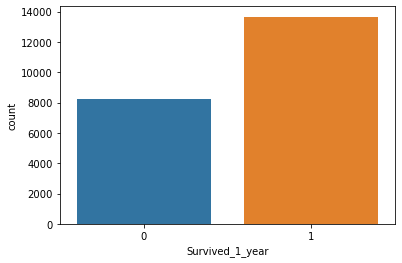

In [50]:
sns.countplot(data['Survived_1_year'])

<AxesSubplot:xlabel='Diagnosed_Condition', ylabel='count'>

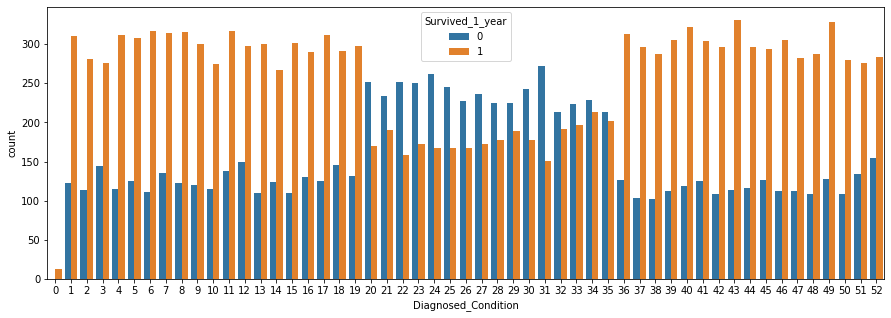

In [51]:
#plt.xticks(rotation = 60, ha = 'right')
plt.figure(figsize = (15, 5))
sns.countplot(data['Diagnosed_Condition'], hue = data['Survived_1_year'])


<AxesSubplot:xlabel='Patient_Smoker', ylabel='count'>

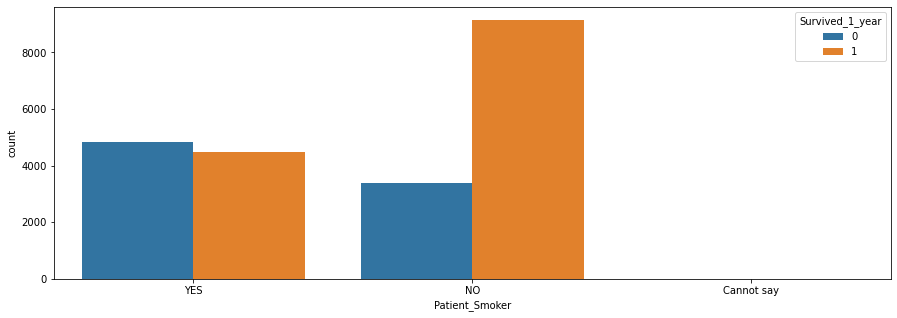

In [52]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Patient_Smoker'], hue = data['Survived_1_year'])

<AxesSubplot:xlabel='Patient_Rural_Urban', ylabel='count'>

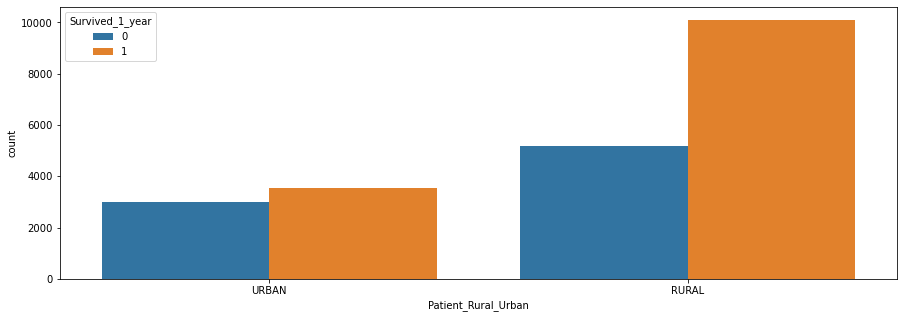

In [53]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Patient_Rural_Urban'], hue = data['Survived_1_year'])

<AxesSubplot:xlabel='Number_of_prev_cond', ylabel='count'>

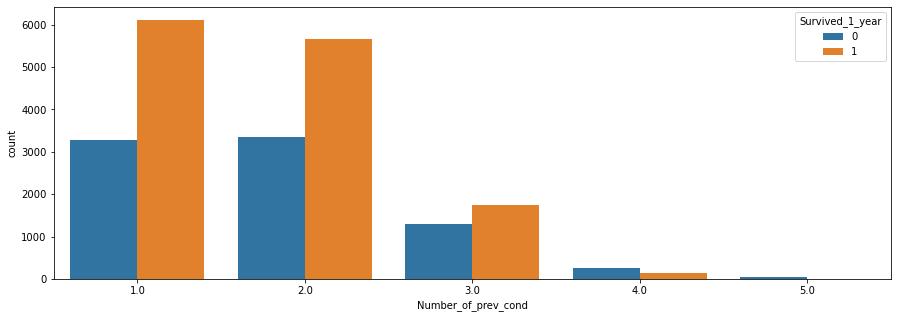

In [54]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Number_of_prev_cond'], hue = data['Survived_1_year'])

In [55]:
data.drop('Patient_mental_condition' , inplace = True, axis = 'columns')

In [56]:
data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,8,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,5,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,23,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,51,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,0,DX6,128,1.348400,Cannot say,RURAL,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


In [57]:
data = data.loc[data['Patient_Smoker'] != 'Cannot say']

In [58]:
data.shape

(21849, 21)

<AxesSubplot:xlabel='Treated_with_drugs', ylabel='count'>

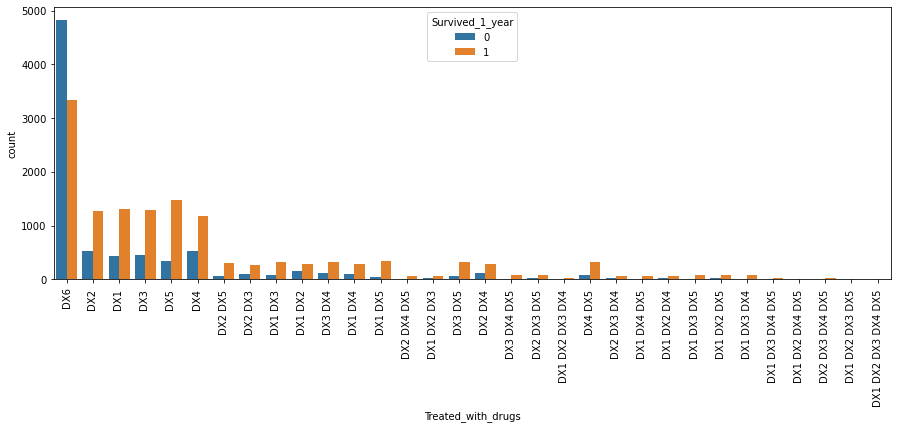

In [59]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.countplot(data['Treated_with_drugs'], hue = data['Survived_1_year'])

In [60]:
data.Patient_Age.describe()

count    21849.000000
mean        33.232230
std         19.406999
min          0.000000
25%         16.000000
50%         33.000000
75%         50.000000
max         66.000000
Name: Patient_Age, dtype: float64

<AxesSubplot:xlabel='Patient_Age', ylabel='Density'>

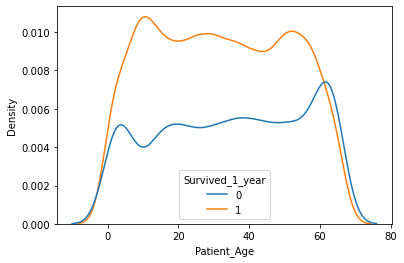

In [61]:
sns.kdeplot(data['Patient_Age'], hue = data['Survived_1_year'])

<AxesSubplot:xlabel='Patient_Body_Mass_Index'>

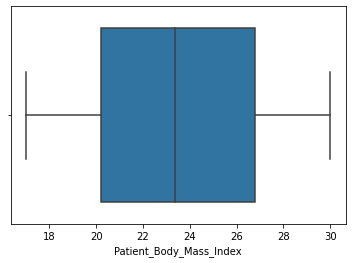

In [62]:
sns.boxplot(data['Patient_Body_Mass_Index'])

In [63]:
'''age_bins = [0, 12, 18, 59, 100]
age_labels = ['child', 'adolescent', 'adult', 'old']
data['Patient_Age'] = pd.cut(data['Patient_Age'], bins = age_bins, labels = age_labels)
data.head()'''

"age_bins = [0, 12, 18, 59, 100]\nage_labels = ['child', 'adolescent', 'adult', 'old']\ndata['Patient_Age'] = pd.cut(data['Patient_Age'], bins = age_bins, labels = age_labels)\ndata.head()"

In [64]:
'''sns.countplot(data['Patient_Age'], hue = data['Survived_1_year'])'''

"sns.countplot(data['Patient_Age'], hue = data['Survived_1_year'])"

In [65]:
'''bmi_bins = [0, 18.5, 24.9, 29.9, 39.9]
bmi_labels = ['underweight ', 'healthy ', 'overweight ', 'obese']
data['Patient_Body_Mass_Index'] = pd.cut(data['Patient_Body_Mass_Index'], bins = bmi_bins, labels = bmi_labels)
data.head()'''

"bmi_bins = [0, 18.5, 24.9, 29.9, 39.9]\nbmi_labels = ['underweight ', 'healthy ', 'overweight ', 'obese']\ndata['Patient_Body_Mass_Index'] = pd.cut(data['Patient_Body_Mass_Index'], bins = bmi_bins, labels = bmi_labels)\ndata.head()"

In [66]:
'''sns.countplot(data['Patient_Body_Mass_Index'], hue = data['Survived_1_year'])'''

"sns.countplot(data['Patient_Body_Mass_Index'], hue = data['Survived_1_year'])"

In [67]:
'''data2 = pd.get_dummies(data, columns = ['Patient_Age','Patient_Body_Mass_Index','Patient_Smoker', 'Patient_Rural_Urban', 'Diagnosed_Condition'], drop_first = True)
data2.head()'''

"data2 = pd.get_dummies(data, columns = ['Patient_Age','Patient_Body_Mass_Index','Patient_Smoker', 'Patient_Rural_Urban', 'Diagnosed_Condition'], drop_first = True)\ndata2.head()"

In [68]:
data2 = pd.get_dummies(data, columns = ['Patient_Smoker', 'Patient_Rural_Urban', 'Diagnosed_Condition'], drop_first = True)
data2.head()

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Diagnosed_Condition_43,Diagnosed_Condition_44,Diagnosed_Condition_45,Diagnosed_Condition_46,Diagnosed_Condition_47,Diagnosed_Condition_48,Diagnosed_Condition_49,Diagnosed_Condition_50,Diagnosed_Condition_51,Diagnosed_Condition_52
0,DX6,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,DX2,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,DX6,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,DX1,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5,DX6,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
data2.columns

Index(['Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'A',
       'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year',
       'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'Patient_Smoker_YES',
       'Patient_Rural_Urban_URBAN', 'Diagnosed_Condition_2',
       'Diagnosed_Condition_3', 'Diagnosed_Condition_4',
       'Diagnosed_Condition_5', 'Diagnosed_Condition_6',
       'Diagnosed_Condition_7', 'Diagnosed_Condition_8',
       'Diagnosed_Condition_9', 'Diagnosed_Condition_10',
       'Diagnosed_Condition_11', 'Diagnosed_Condition_12',
       'Diagnosed_Condition_13', 'Diagnosed_Condition_14',
       'Diagnosed_Condition_15', 'Diagnosed_Condition_16',
       'Diagnosed_Condition_17', 'Diagnosed_Condition_18',
       'Diagnosed_Condition_19', 'Diagnosed_Condition_20',
       'Diagnosed_Condition_21', 'Diagnosed_Condition_22',
       'Diagnosed_Condition_23', 'Diagnosed_Condition_24',
       'Diagnosed_Condition_25', 'Diagnosed_Condition_26',
       'Diag

In [70]:
data2['No-Of_Drugs'] = data['DX1'] + data['DX2'] + data['DX3'] + data['DX4'] + data['DX5'] + data['DX6']

<AxesSubplot:xlabel='No-Of_Drugs', ylabel='count'>

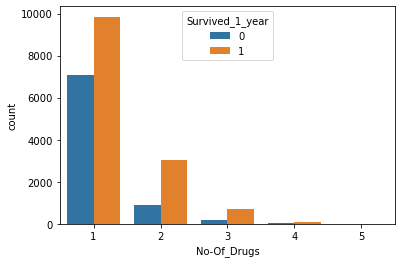

In [71]:
sns.countplot(data2['No-Of_Drugs'], hue = data2['Survived_1_year'])

In [72]:
data2.drop(columns = ['DX6', 'Treated_with_drugs'], inplace = True,axis = 'columns' )

In [73]:
data2.head()

,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,...,Diagnosed_Condition_44,Diagnosed_Condition_45,Diagnosed_Condition_46,Diagnosed_Condition_47,Diagnosed_Condition_48,Diagnosed_Condition_49,Diagnosed_Condition_50,Diagnosed_Condition_51,Diagnosed_Condition_52,No-Of_Drugs
0,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,1
5,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1


In [74]:
x = data2.drop(columns = ['Survived_1_year'], axis = 'columns')
y = data2['Survived_1_year']
x.shape, y.shape

((21849, 69), (21849,))

In [75]:
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({1: 13642, 0: 8207})
Resample dataset shape Counter({0: 13642, 1: 13642})


In [76]:
data2.columns

Index(['Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year', 'DX1', 'DX2', 'DX3',
       'DX4', 'DX5', 'Patient_Smoker_YES', 'Patient_Rural_Urban_URBAN',
       'Diagnosed_Condition_2', 'Diagnosed_Condition_3',
       'Diagnosed_Condition_4', 'Diagnosed_Condition_5',
       'Diagnosed_Condition_6', 'Diagnosed_Condition_7',
       'Diagnosed_Condition_8', 'Diagnosed_Condition_9',
       'Diagnosed_Condition_10', 'Diagnosed_Condition_11',
       'Diagnosed_Condition_12', 'Diagnosed_Condition_13',
       'Diagnosed_Condition_14', 'Diagnosed_Condition_15',
       'Diagnosed_Condition_16', 'Diagnosed_Condition_17',
       'Diagnosed_Condition_18', 'Diagnosed_Condition_19',
       'Diagnosed_Condition_20', 'Diagnosed_Condition_21',
       'Diagnosed_Condition_22', 'Diagnosed_Condition_23',
       'Diagnosed_Condition_24', 'Diagnosed_Condition_25',
       'Diagnosed_Condition_26', 'Diagnosed_Condition_27',
       'Diagnos

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state = 42, test_size = 0.1)
x_train.shape, x_test.shape

((24555, 69), (2729, 69))

def GetBasedModel():
    basedModels = []
    '''basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))'''
    basedModels.append(('KNN'  , KNeighborsClassifier(n_jobs = -1)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    #basedModels.append(('NB'   , GaussianNB()))
    #basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier(n_jobs = -1)))
    basedModels.append(('ET'   , ExtraTreesClassifier(n_jobs = -1)))

    
    return basedModels

def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 5
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1', n_jobs = -1, verbose = 3)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

models = GetBasedModel()
names,results = BasedLine2(x_train, y_train,models)


std = StandardScaler()
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.fit_transform(x_test)
names,results = BasedLine2(x_train_scaled, y_train,models)

rf_tuner = RandomForestClassifier(n_jobs = -1)
param_grid = { 
    'n_estimators': [100, 200, 500, 600, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, None],
    'criterion' :['gini', 'entropy'],
    'min_samples_split':[1, 2, 3, 4, 5],
    'min_samples_leaf':[1, 2, 3, 4, 5],
    'bootstrap':[True, False]
}
CV_rfc = RandomizedSearchCV(estimator = rf_tuner, param_distributions=param_grid, cv= 5, n_jobs = -1, verbose = 2)
CV_rfc.fit(x_train, y_train)

CV_rfc.best_score_

CV_rfc.best_params_

In [78]:
rfc_tuned = RandomForestClassifier(n_estimators= 500,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'log2',
 max_depth=None,
 criterion= 'entropy',
 bootstrap=False)
rfc_tuned.fit(x_train, y_train)
rfc_tuned_pred = rfc_tuned.predict(x_test)

In [79]:
rfc_report = classification_report(y_test, rfc_tuned_pred)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1374
           1       0.89      0.87      0.88      1355

    accuracy                           0.88      2729
   macro avg       0.88      0.88      0.88      2729
weighted avg       0.88      0.88      0.88      2729



etc = ExtraTreesClassifier(n_jobs = -1)
cv_et = RandomizedSearchCV(estimator=etc, param_distributions=param_grid, cv= 5, n_jobs = -1, verbose = 2)
cv_et.fit(x_train, y_train)

cv_et.best_score_

cv_et.best_params_

In [80]:
et_tuned = ExtraTreesClassifier(n_estimators = 600,
 min_samples_split= 4,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= None,
 criterion= 'entropy',
 bootstrap= True, n_jobs = -1)
et_tuned.fit(x_train, y_train)
et_tuned_pred = et_tuned.predict(x_test)

In [81]:
et_report = classification_report(y_test, et_tuned_pred)
print(et_report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1374
           1       0.87      0.83      0.85      1355

    accuracy                           0.86      2729
   macro avg       0.86      0.86      0.86      2729
weighted avg       0.86      0.86      0.86      2729



gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
gbm_cv = RandomizedSearchCV(gbc, parameters, cv=5, n_jobs = -1, verbose = 2)
gbm_cv.fit(x_train, y_train)


gbm_cv.best_score_

gbm_cv.best_params_

In [82]:
gbc_tuned = GradientBoostingClassifier(n_estimators = 100, max_depth = 16, learning_rate = 0.5)
gbc_tuned.fit(x_train, y_train)
gbc_tuned_pred = gbc_tuned.predict(x_test)

In [83]:
gbc_report = classification_report(y_test, gbc_tuned_pred)
print(gbc_report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1374
           1       0.88      0.87      0.87      1355

    accuracy                           0.88      2729
   macro avg       0.88      0.88      0.88      2729
weighted avg       0.88      0.88      0.88      2729



In [84]:
voting_clf = VotingClassifier(estimators=[('RFC', rfc_tuned), ('GBC', gbc_tuned), ('ETC', et_tuned)], voting='hard', n_jobs = -1)
voting_clf.fit(x_train, y_train)
preds = voting_clf.predict(x_test)
acc = accuracy_score(y_test, preds)
#l_loss = log_loss(y_test, preds)
f1 = f1_score(y_test, preds)

In [85]:
print(f1)

0.8753275926619244


In [86]:
test_data = pd.read_csv('test.csv')


In [87]:
test_data.drop(columns = ['ID_Patient_Care_Situation', 'Patient_ID'], inplace = True, axis = 'columns')

In [88]:
test_data['Treated_with_drugs'] = test_data['Treated_with_drugs'].map(lambda x: x.upper())

In [89]:
test_data.shape

(9330, 15)

In [90]:
test_data.isnull().sum()

Diagnosed_Condition         0
Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
dtype: int64

In [91]:
for i in range(1, 7):
    test_data['DX' + str(i)] = 0
test_data.head()


,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,35,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0,0,0,0,0,0
1,30,DX1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0,0,0,0,0,0
2,46,DX6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,0
3,44,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,...,1.0,0.0,0.0,2.0,0,0,0,0,0,0
4,30,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,0,0,0,0


In [92]:
def rename(x):
    if x in ['YESS ', 'YESS', 'YES ']:
        return 'YES'
    elif x in ['NO ']:
        return 'NO'
    return x
test_data['Patient_Smoker'] = test_data['Patient_Smoker'].apply(rename)

In [93]:
test_data['Patient_Smoker'].unique()

array(['NO', 'YES'], dtype=object)

In [94]:
test_data['Patient_Smoker'].value_counts()

NO     5373
YES    3957
Name: Patient_Smoker, dtype: int64

In [95]:
for i in test_data.index:
    for j in test_data['Treated_with_drugs'][i].split():
        test_data.loc[i, j] = 1

In [96]:
test_data.drop('Patient_mental_condition' , inplace = True, axis = 'columns')

In [97]:
test_data = test_data.loc[test_data['Patient_Smoker'] != 'Cannot say']
test = pd.get_dummies(test_data, columns = ['Patient_Smoker', 'Patient_Rural_Urban', 'Diagnosed_Condition'], drop_first = True)
test.head()

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Diagnosed_Condition_43,Diagnosed_Condition_44,Diagnosed_Condition_45,Diagnosed_Condition_46,Diagnosed_Condition_47,Diagnosed_Condition_48,Diagnosed_Condition_49,Diagnosed_Condition_50,Diagnosed_Condition_51,Diagnosed_Condition_52
0,DX5,65,20.710365,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,DX1,2,24.250219,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,DX6,1,27.139276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,DX1,29,29.191759,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,DX5,51,20.844146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
test.shape

(9330, 70)

In [99]:
test['No-Of_Drugs'] = test_data['DX1'] + test_data['DX2'] + test_data['DX3'] + test_data['DX4'] + test_data['DX5'] + test_data['DX6']

In [100]:
test.drop(columns = ['DX6', 'Treated_with_drugs'], inplace = True,axis = 'columns' )

In [106]:
x_train.shape, test.shape

((24555, 69), (9330, 69))

In [107]:
x_train.head()

,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,...,Diagnosed_Condition_44,Diagnosed_Condition_45,Diagnosed_Condition_46,Diagnosed_Condition_47,Diagnosed_Condition_48,Diagnosed_Condition_49,Diagnosed_Condition_50,Diagnosed_Condition_51,Diagnosed_Condition_52,No-Of_Drugs
21221,36,24.415288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,3
6422,57,19.254449,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,2
23215,21,20.009197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
22427,34,28.074180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
13310,27,21.302814,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
preds = pd.DataFrame({'prediction':voting_clf.predict(test)})

In [114]:
preds.to_csv('Pedictions.csv', index = False) 